### Import the requirement packages

In [166]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

### Read the csv as dataframe

In [167]:
df = pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### View the field names

In [168]:
print('numbert of rows in dataframe: ', df.shape[0])
print('numbert of columns in dataframe: ', df.shape[1])
print('Columns : ', df.columns)

numbert of rows in dataframe:  1460
numbert of columns in dataframe:  81
Columns :  Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'Garag

### View the information about the dataframe

In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Check the missing values using vishualization technique

<Axes: >

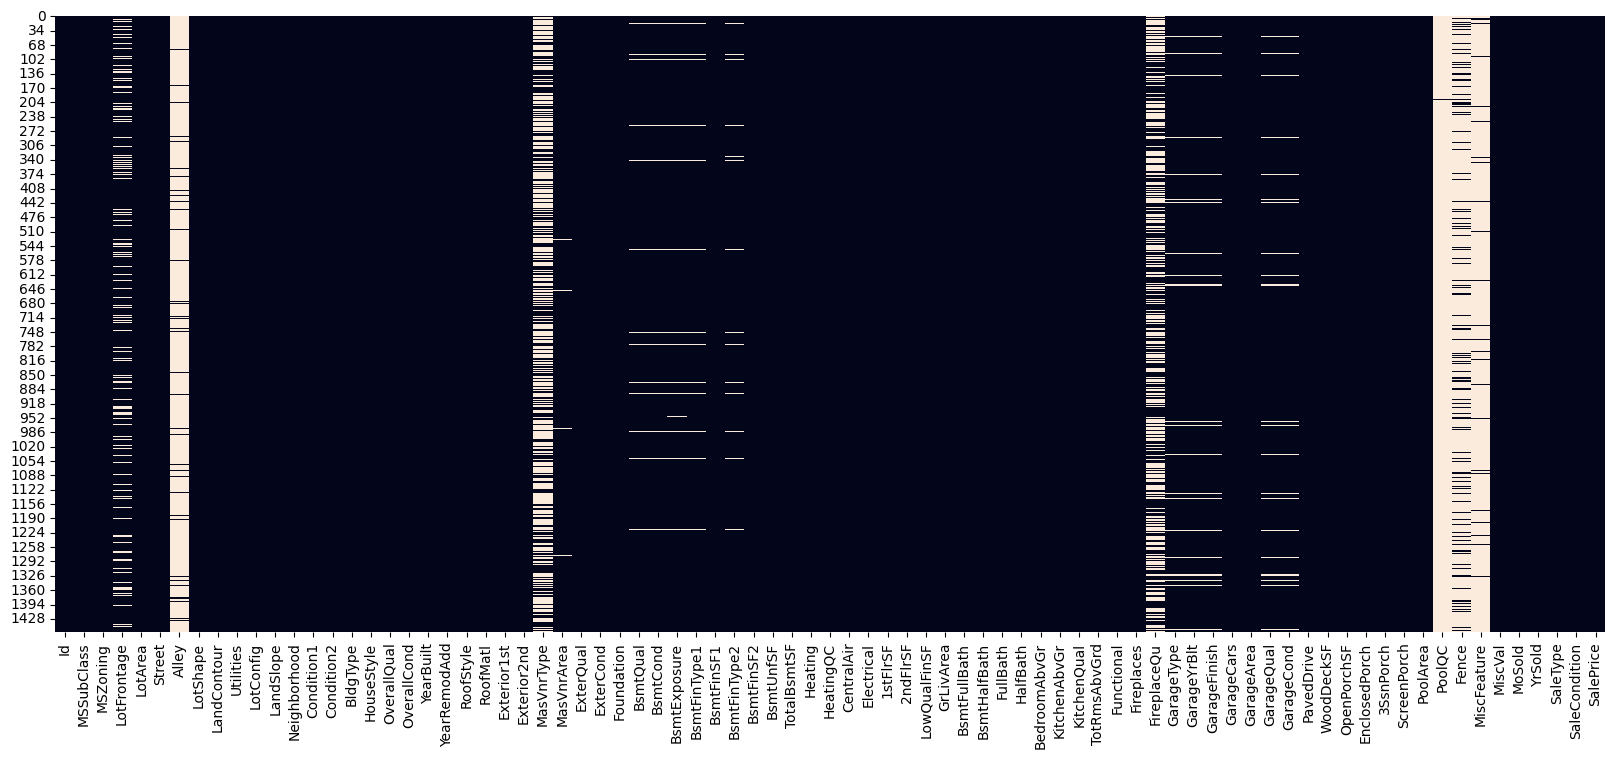

In [170]:
fig = plt.figure(figsize=(20, 8))
sns.heatmap(df.isna(), cbar=False)

### View missing values detial

In [171]:
columns_with_missing_values = [ column for column in df.columns if df[column].isna().sum() > 0 ] 
missing_count = [df[column].isna().sum() for column in columns_with_missing_values]
missing_count_persentage = [df[column].isna().sum()/len(df[column])*100 for column in columns_with_missing_values]

missing_values_detail_df = pd.DataFrame({
    'Fields': columns_with_missing_values,
    'Missing Counts': missing_count,
    'Missing Count Persentage': missing_count_persentage
})

missing_values_detail_df

,Fields,Missing Counts,Missing Count Persentage
0,LotFrontage,259,17.739726
1,Alley,1369,93.767123
2,MasVnrType,872,59.726027
3,MasVnrArea,8,0.547945
4,BsmtQual,37,2.534247
5,BsmtCond,37,2.534247
6,BsmtExposure,38,2.602740
7,BsmtFinType1,37,2.534247
8,BsmtFinType2,38,2.602740
9,Electrical,1,0.068493


### View the missing_values_detail_df with missing values above 25%

In [172]:
columns_with_high_missing_values = missing_values_detail_df[missing_values_detail_df['Missing Count Persentage'] > 25]
columns_with_low_missing_values = missing_values_detail_df[missing_values_detail_df['Missing Count Persentage'] < 25]
columns_with_high_missing_values

,Fields,Missing Counts,Missing Count Persentage
1,Alley,1369,93.767123
2,MasVnrType,872,59.726027
10,FireplaceQu,690,47.260274
16,PoolQC,1453,99.520548
17,Fence,1179,80.753425
18,MiscFeature,1406,96.301370


### Drop the fieldes with high missing values

In [173]:
df_after_drop_columns = df.drop(columns=columns_with_high_missing_values.Fields, axis=1)
print('number of fields after drop the columns with high missing values:', len(df_after_drop_columns.columns))

number of fields after drop the columns with high missing values: 75


### Split the columns_with_low_missing_values as catagorical and numaric

In [174]:
cat_missing_value_columns = [column for column in columns_with_low_missing_values.Fields if df[column].dtype == 'object']
num_missing_value_columns = [column for column in columns_with_low_missing_values.Fields if df[column].dtype != 'object']
print('number of catagorical columns with missing values: ', len(cat_missing_value_columns))
print('number of numarical columns with missing values: ', len(num_missing_value_columns))
print('catagorical columns with missing values: ', cat_missing_value_columns)
print('numarical columns with missing values: ', num_missing_value_columns)

number of catagorical columns with missing values:  10
number of numarical columns with missing values:  3
catagorical columns with missing values:  ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
numarical columns with missing values:  ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']


### Fill the missing values in the dataframe after droping the high missing values columns 

In [175]:
df_after_drop_columns[cat_missing_value_columns] = df_after_drop_columns[cat_missing_value_columns].apply(lambda x: x.fillna(x.mode()[0]))
df_after_drop_columns[num_missing_value_columns] = df_after_drop_columns[num_missing_value_columns].apply(lambda x: x.fillna(x.mean()))

columns_with_missing_values = [ column for column in df_after_drop_columns.columns if df_after_drop_columns[column].isna().sum() > 0 ] 
print('Columns with missing values: ', columns_with_missing_values)

Columns with missing values:  []


In [176]:
df_after_drop_columns.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,22.024023,9981.264932,1.382997,1.112799,30.202904,20.645407,180.569112,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,70.049958,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [177]:
cat_df_columns = [column for column in df_after_drop_columns.columns if df_after_drop_columns[column].dtype == 'object']
num_df_columns = [column for column in df_after_drop_columns.columns if df_after_drop_columns[column].dtype != 'object']

print('nnumber of Catagorical columns: ', len(cat_df_columns))
print('number of numarical columns: ', len(num_df_columns))
print('Catagorical columns: ', cat_df_columns)
print('Numarical columns: ', num_df_columns)

nnumber of Catagorical columns:  37
number of numarical columns:  38
Catagorical columns:  ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']
Numarical columns:  ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'Gara

In [178]:
encoder = LabelEncoder()

for column in cat_df_columns:
    df_after_drop_columns[column] = encoder.fit(df_after_drop_columns[column].drop_duplicates()).transform(df_after_drop_columns[column])

df_after_drop_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   int32  
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   int32  
 6   LotShape       1460 non-null   int32  
 7   LandContour    1460 non-null   int32  
 8   Utilities      1460 non-null   int32  
 9   LotConfig      1460 non-null   int32  
 10  LandSlope      1460 non-null   int32  
 11  Neighborhood   1460 non-null   int32  
 12  Condition1     1460 non-null   int32  
 13  Condition2     1460 non-null   int32  
 14  BldgType       1460 non-null   int32  
 15  HouseStyle     1460 non-null   int32  
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

### split the dataframe into features and target

In [179]:
df_after_drop_columns.drop(columns=['Id'], axis=1, inplace=True)
features = df_after_drop_columns.drop(columns=['SalePrice'], axis=1)
target = df_after_drop_columns.SalePrice

In [180]:
features.shape, target.shape

((1460, 73), (1460,))

### Export the features and target dataframe into csv file

In [181]:
features.to_csv('train_features.csv', index=False)
target.to_csv('train_target.csv', index=False)